#**Prodigy Task** **2**

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data

##**The data understanding**

`Passenger ID` - To identify unique passengers

`Survived` - If they survived or not

`P Class` - The class passengers travelled in

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

`Name` - Passenger Name

`Sex` - Gender of Passenger

`Age` - Age of passenger

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`SibSp` - Number of siblings or spouse

`Parch` - Parent or child

`Ticket` - Ticket number

`Fare` - Amount paid for the ticket

`Cabin` - Cabin of residence

`Embarked` - Point of embarkmen

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df.drop(columns="Cabin",axis=1,inplace=True)

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-10-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<ipython-input-11-4a47dd7a9b9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

0

In [14]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<ipython-input-15-671bae95409f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='viridis',)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


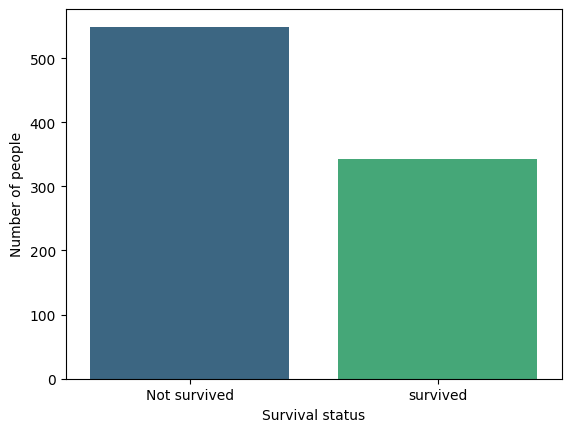

In [15]:
sns.countplot(x='Survived',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

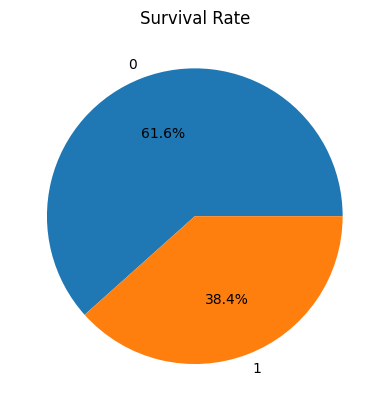

In [16]:
def plot_survival_rate(df):
    #Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%')

    # Add a title
    ax.set_title('Survival Rate')

    # Show the plot
    plt.show()
plot_survival_rate(df)

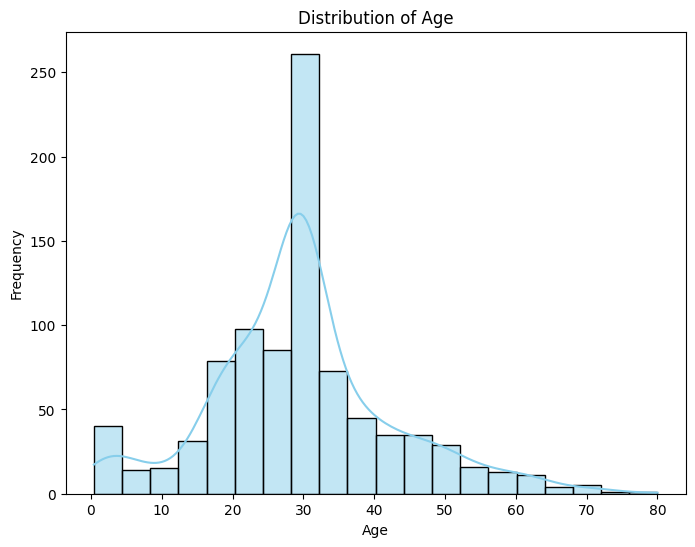

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


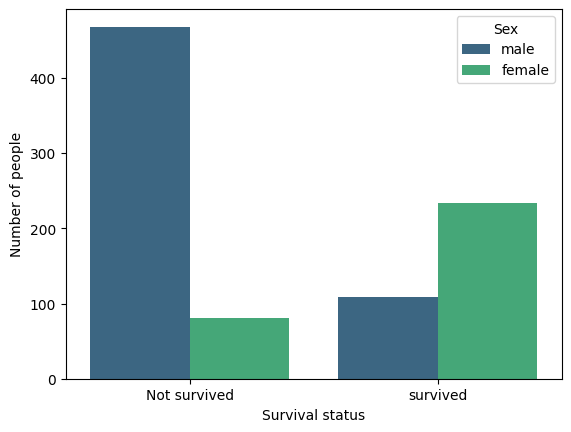

In [18]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

<ipython-input-19-8d400ec69aed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futu

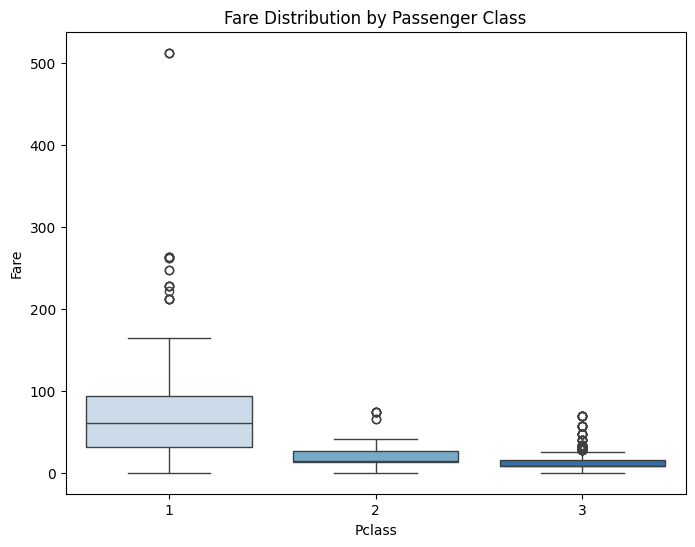

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Blues')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()

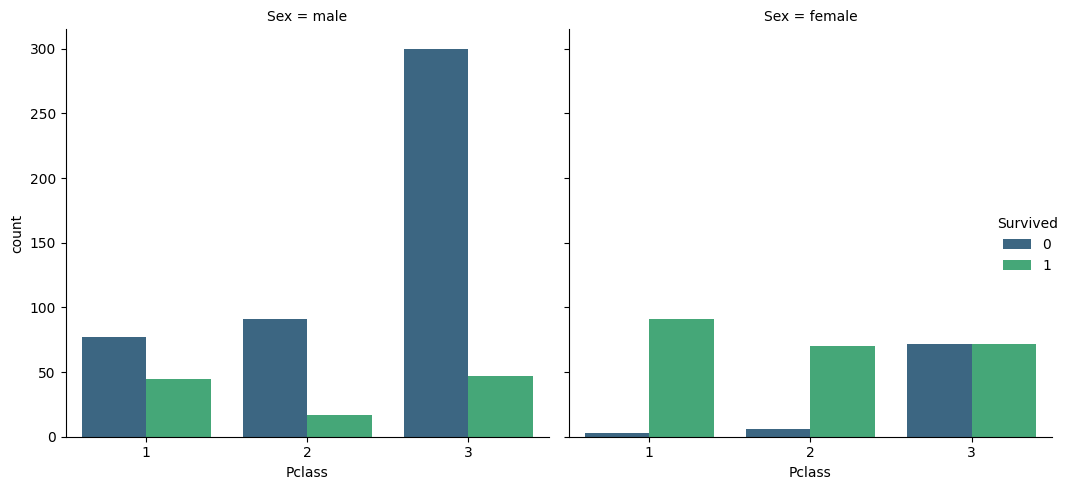

In [20]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data =
df,palette='viridis' )
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

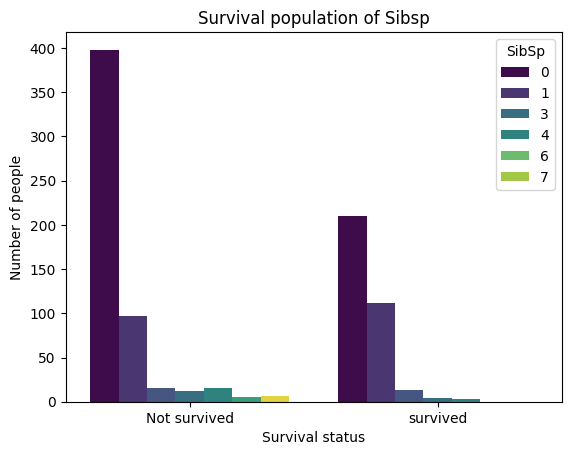

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

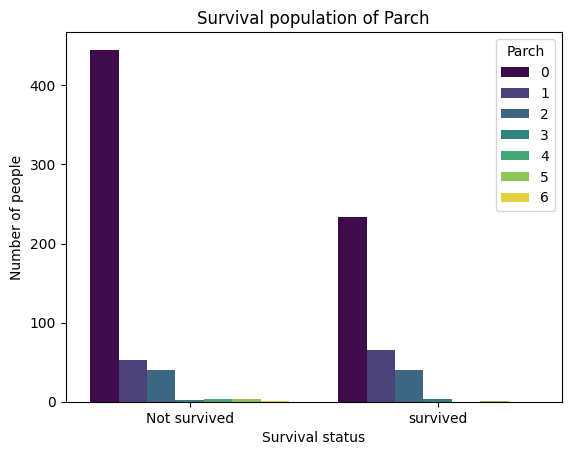

In [21]:
sns.countplot(x ='Survived', hue='SibSp',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.show()

sns.countplot(x ='Survived',hue='Parch',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


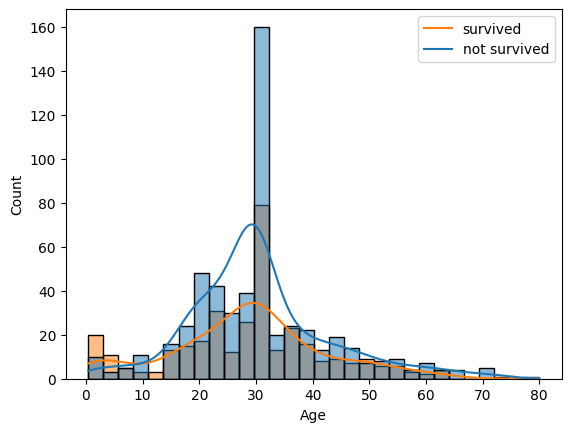

In [22]:
sns.histplot(x='Age',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

In [23]:
df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

<ipython-input-23-593dffb7bd35>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [25]:
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

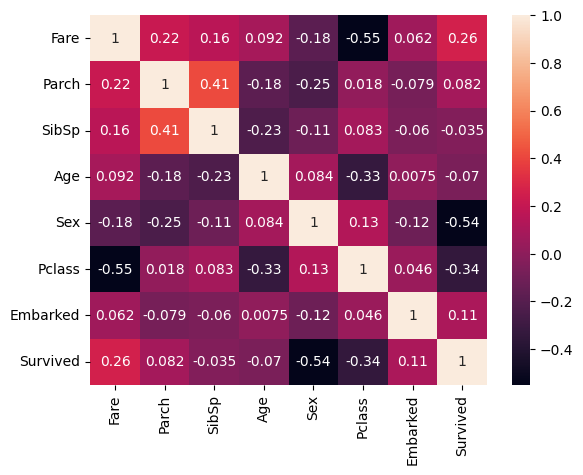

In [26]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

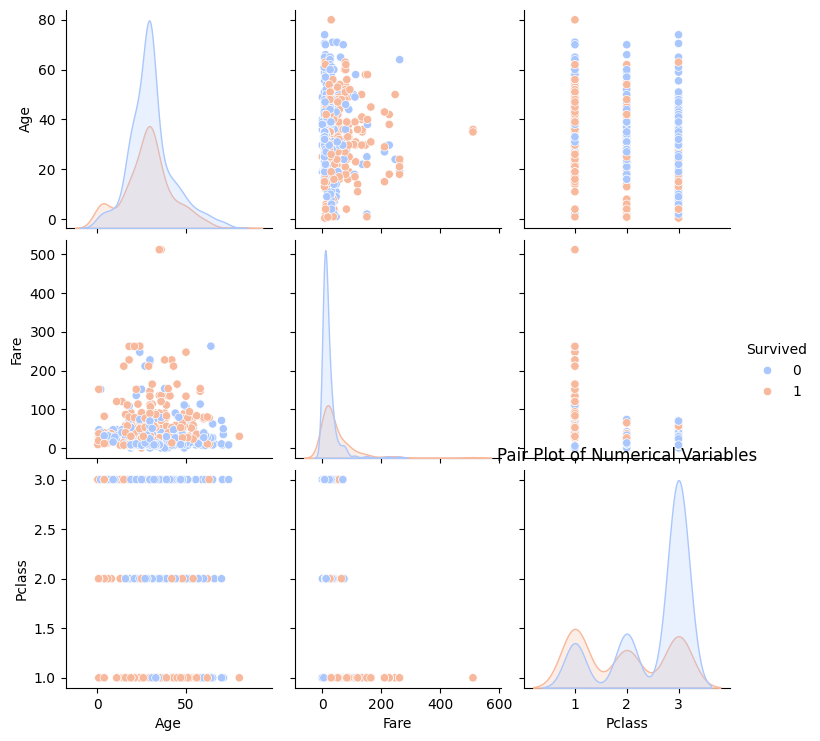

In [27]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='coolwarm')
plt.title('Pair Plot of Numerical Variables')
plt.show()

#**Conclusion**:


**Gender Disparity**: The survival rate among females was significantly higher compared to males. This observation aligns with the "women and children first" protocol followed during the Titanic disaster, reflecting societal norms of the time prioritizing women's and children's safety.


**Passenger Class Disparity**: Although the population of passengers in Class 3 was the highest, they had the lowest survival rate. This indicates a potential correlation between socio-economic status and survival, with passengers in higher classes likely having better access to lifeboats and other resources during the evacuation.


**Gender and Passenger Class Interaction**: Further analysis reveals that males from Class 3 had the lowest survival rate. This suggests a compounded effect of gender and socio-economic status, where male passengers in the lower classes faced the highest risk of not surviving the disaster.


**Age Factor**: Young adults had the least survival rate, indicating that age played a role in survival outcomes. This could be attributed to the "women and children first" policy, where younger individuals were given priority during the evacuation.


**Correlation with Survived Column**: The variables fare, sex, passenger class (Pclass), and embarkation point (Embarked) show correlations with the survival outcome. This reinforces the importance of these factors in determining survival chances during the Titanic disaster.